# Visualize the created graph

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import scanpy as sc

"""
Purpose: Quick visualization of final produced graph
Params: graph object, adata object, dataset name
Return: None
"""
def check_graph(graph, adata, dataset):
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f"{dataset} Graph Diagnostics", fontsize=14)
    
    """PCA by cell types"""
    ax = axes[0, 0]
    sc.pl.pca(adata, color='celltype', ax=ax, show=False, title='PCA: Cell Types')
    
    """PCA by timepoint"""
    ax = axes[0, 1]
    sc.pl.pca(adata, color='timepoint', ax=ax, show=False, title='PCA: Timepoints', color_map='viridis')
    
    """Edge weights distribution"""
    ax = axes[0, 2]
    weights = graph.edge_attr.numpy().flatten()
    ax.hist(weights, bins=50, edgecolor='black', alpha=0.7)
    ax.axvline(weights.mean(), color='red', linestyle='--', label=f'Mean: {weights.mean():.3f}')
    ax.set_xlabel('Edge Weight')
    ax.set_ylabel('Count')
    ax.set_title('Edge Weight Distribution')
    ax.legend()
    
    """Velocity alignment distribution"""
    ax = axes[1, 0]
    if hasattr(graph, 'velocity_alignment'):
        align = graph.velocity_alignment.numpy()
        ax.hist(align, bins=50, edgecolor='black', alpha=0.7, color='green')
        ax.axvline(align.mean(), color='red', linestyle='--', label=f'Mean: {align.mean():.3f}')
        ax.set_xlabel('Velocity Alignment')
        ax.set_title('Velocity Alignment Distribution')
        ax.legend()
    else:
        ax.text(0.5, 0.5, 'No velocity alignment yet', ha='center', va='center')
        ax.set_title('Velocity Alignment Distribution')
    
    """Node degree distribution"""
    ax = axes[1, 1]
    edge_index = graph.edge_index.numpy()
    degrees = np.bincount(edge_index[0], minlength=graph.x.shape[0])
    ax.hist(degrees, bins=50, edgecolor='black', alpha=0.7, color='orange')
    ax.axvline(degrees.mean(), color='red', linestyle='--', label=f'Mean: {degrees.mean():.1f}')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Count')
    ax.set_title('Node Degree Distribution')
    ax.legend()
    
    """Summarize the graph w/ quick stats"""
    ax = axes[1, 2]
    ax.axis('off')
    
    stats_text = f"""
    GRAPH SUMMARY
    ─────────────────────
    Nodes:        {graph.x.shape[0]:,}
    Edges:        {graph.edge_index.shape[1]:,}
    Node features:{graph.x.shape[1]}
    
    EDGE WEIGHTS
    ─────────────────────
    Min:   {weights.min():.3f}
    Max:   {weights.max():.3f}
    Mean:  {weights.mean():.3f}
    Std:   {weights.std():.3f}
    
    CELL TYPES
    ─────────────────────
    {adata.obs['celltype'].value_counts().to_string()}
    """
    
    ax.text(0.1, 0.5, stats_text, fontsize=10, family='monospace', va='center')
    
    plt.tight_layout()
    plt.savefig(f"{dataset}_graph_diagnostics.png", dpi=150)
    plt.show()
    
    print(f"\nSaved: {dataset}_graph_diagnostics.png")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


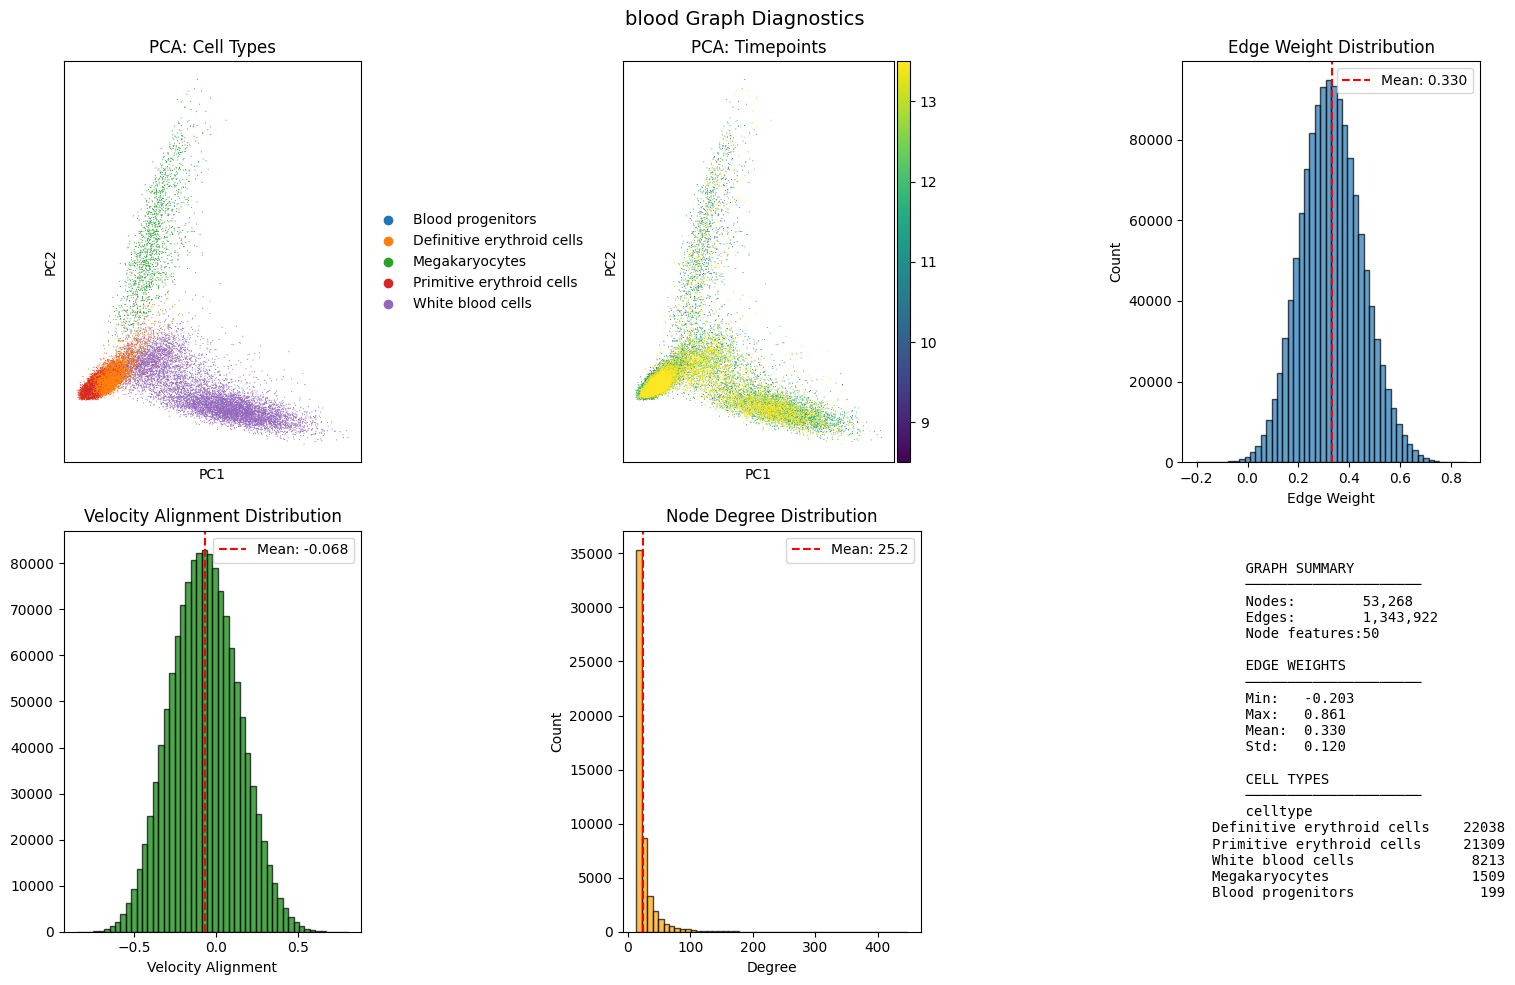


Saved: blood_graph_diagnostics.png


In [2]:
# load graph and data
graph = torch.load("blood_graph_velocity.pt", weights_only=False)
adata = sc.read_h5ad("blood_velocity_computed.h5ad")

check_graph(graph, adata, "blood")